# Name:Saanvi Mudholkar

# Student ID:20298508

# Coursework 3 #

There are three questions below, each associated to one of the core modules, Analytical and Computational Foundations (ACF), Calculus (CAL) and Linear Mathematics (LMA).

### Marks 
- Each of the questions is worth in total 20 marks. 
- The marks are divided amongst different sub-questions and a certain number of marks is assigned to a particular test or task. 
- The number of marks asssociated with an automated test-cell is indicated in a comment at the top of that cell. 

#### How to Answer
Write your code in the "answer" cell where it says "# YOUR CODE HERE"
and remove both the line "# YOUR CODE HERE" and the line "raise NotImplementedError()"

**Important**: Do not change the name or remove the existing function, and write all your code "inside" the existing function, i.e. with at least one-tab's indentation.

When you have written your code you should evaluate the cell and then evaluate the "Test" cells following it. If you don't see any errors then your code is (hopefully) correct and you can go on to the next question. 

If you see some errors then you have to go back and edit your code and try to fix the "bug". 

For all questions you are allowed to use any built-in functions in NumPy, Matplotlib, SymPy, as well as the standard libraries like 'math', unless otherwise specified. 

All plots should be done 'inline', in other words, do not use "popup" windows.

## Question 1 [ACF]
It is possible to use different methods to compute approximations to $\pi$. 
One way is to use the so-called Monte Carlo method which uses random numbers to estimate $\pi$. 
Consider the figure below, which shows the unit disc inscribed in the unit square for $x,y\in [0,1]$. 
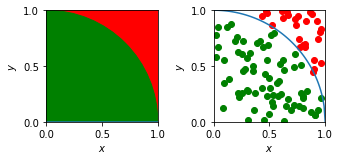

Denote the areas of the square and disc by $A_s$ and $A_d$, respectively. Then of course $A_s=1$ and $A_d=\pi/4$ so 

$$
\frac{A_d}{A_s} = \frac{\pi}{4}.
$$

In the right-hand figure, a set of $N_{total}$ random points (uniformly distributed) have been plotted on the unit square. The points inside and outside the disc are coloured green and red, respectively. If the number of points inside the disc are denoted $N_{disc}$, then the ratio of $N_{disc}$ to $N_{total}$ is an approximation of the ratio of areas above, namely
$$
\frac{N_{disc}}{N_{total}} \approx \frac{\pi}{4} \Rightarrow \pi = 4 \frac{N_{disc}}{N_{total}}.
$$


**(a) [4 marks]** 

Write a function `estimate_pi_monte_carlo` which implements an algorithm for estimating $\pi$ by generating a sequence of $N_{total}$ uniformly distributed random numbers in the unit square, counting how many of those points land inside the unit circle, and then returning an approximation to $\pi$ given by the formula above.

The function should:
- take the number 'Ntotal' as input and raise a ValueError if the input is not a positive integer;
- return a float.

In [3]:
import random
import math
def estimate_pi_monte_carlo(Ntotal):
    if type(Ntotal)!=int or Ntotal<=0:
        raise ValueError("Ntotal must be a postive integer")
    xpoints=[]
    ypoints=[]
    inside_circle=0
    array=[]
    for i in range(0,Ntotal):
        x=random.uniform(0,1)
        y=random.uniform(0,1)
        xpoints.append(x)
        ypoints.append(y)
    for j in range(0,len(xpoints)):
        distance=((xpoints[j]**2)+(ypoints[j]**2))**(0.5)
        if distance<=1:
             inside_circle=inside_circle+1
    estimate=4*(inside_circle/Ntotal)
    return estimate

In [4]:
# 1 mark
# Test that we return a float
from nose.tools import assert_equal
assert_equal(type(estimate_pi_monte_carlo(100)),float)

In [5]:
# 2 marks
# Check that the correct value is output
from nose.tools import assert_almost_equal
import math
# Correct approximations might be bad by chance so we put in an error tolerance of 0.5
assert_almost_equal(estimate_pi_monte_carlo(100000),math.pi,delta=0.5) 

In [6]:
# 1 mark
# Check that ValueError is raised on wrong input
from nose.tools import assert_raises
assert_raises(ValueError,estimate_pi_monte_carlo,-1)
assert_raises(ValueError,estimate_pi_monte_carlo,1.0)

**(b) [4 marks]** 
Illustrate the Monte Carlo method of approximating $\pi$ by writing a function `draw_monte_carlo` which takes as input $N_{total}$ and draws the figures included above with two subplots of the unit square. 
- the left subplot should contain a green quarter circle and the rest red;
- the right subplot should contain a scatter plot of $N_{total}$ uniformly distributed random points;
- the points inside the unit circle should be coloured green and points outside coloured red;
- the unit circle itself should be coloured blue;
- the plot should have relevant labels and tick marks.

Write the function in the next cell and call the function in the following cell to render it.

In [9]:
import numpy as np
import matplotlib.pyplot as plt
def draw_monte_carlo(Ntotal):
    fig=plt.figure(figsize=(4,2))
    ax1=fig.add_subplot(121)
    ax2=fig.add_subplot(122)
    if type(Ntotal)!=int or Ntotal<=0:
        raise ValueError("Ntotal must be a postive integer")
    xpoints=[]
    ypoints=[]
    array1=[]
    array2=[]
    for i in range(0,Ntotal):
        x=random.uniform(0,1)
        y=random.uniform(0,1)
        xpoints.append(x)
        ypoints.append(y)
    for j in range(0,len(xpoints)):
        if ((xpoints[j]**2)+(ypoints[j]**2))**(0.5)<=1:
            ax2.scatter(xpoints[j],ypoints[j], color="green")
        else:
            ax2.scatter(xpoints[j],ypoints[j], color="red")
    x=np.linspace(0,1)
    y1=np.sqrt(1-x**2)
    ax1.set_xlim(0,1)
    ax1.set_ylim(0,1)
    ax1.plot(x,y1)
    ax1.fill_between(x,2-x,color="red")
    ax1.fill_between(x,np.sqrt(1-(x**2)), color="green") 
    ax1.set_xlabel("x scatter points")
    ax1.set_ylabel("y scatter points")
    ax2.set_xlabel("x scatter points")
    ax2.set_ylabel("y scatter points")
    ax2.set_xlim(0,1)
    ax2.set_ylim(0,1)
    ax2.plot(x,y1)
    plt.subplots_adjust(wspace=0.5)
    plt.show()

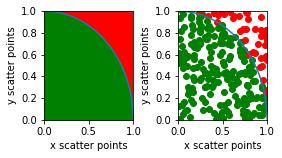

In [10]:
draw_monte_carlo(250)

**(c) [4 marks]**
An alternative method for approximating $\pi$ is to use the partial sum 

$$
S_n = \sum_{k=1}^{n}\frac{1}{k^2}
$$

since it is known that $S_n \to \frac{\pi^2}{6}$. 
(This formula was proven by Euler in 1734 and is a solution to the so-called Basel problem). 

Write a function `estimate_pi_euler` which takes a positive integer $n$ as input and returns an estimate of $\pi$ by using this formula for the given $n$. Your function should also raise a ValueError if the input is not a non-negative integer. 

In [11]:
import math
def estimate_pi_euler(n):
    if type(n)!=int or n<=0:
        raise ValueError("The value of n must be a non-negetive integer")
    sn=0
    for i in range(1,n+1):
        sn=sn+(1/(i**2))
    pi_value=math.sqrt(6*sn)
    return(pi_value)

In [12]:
# 1 mark
# Test that the function returns a float
from nose.tools import assert_equal
assert_equal(type(estimate_pi_euler(100)),float)

In [13]:
# 2 marks
# Test that the euler method outputs a number reasonably close to pi
from nose.tools import assert_almost_equal
import math
assert_almost_equal(estimate_pi_euler(100000),math.pi,delta=0.1) 

In [14]:
# 1 mark
# Check that ValueError is raised for incorrect input
from nose.tools import assert_raises
assert_raises(ValueError,estimate_pi_euler,-1)
assert_raises(ValueError,estimate_pi_euler,1.0)

**(d) [4 marks]** 
There are many many more ways to approximate $\pi$. One of the most efficient algorithms is using the following partial sums:

$$
S_n = {\frac {2{\sqrt {2}}}{9801}}\sum _{k=0}^{n }{\frac {(4k)!(1103+26390k)}{(k!)^{4}396^{4k}}}
$$

since it is know that $S_n \to \frac{1}{\pi}$ as $n\to \infty$. This series was discovered by Ramanujan in 1910 and versions of it are used for all record-breaking calculations for digits of $\pi$. 

Write a function `estimate_pi_ramanujan` which takes a non-negative integer $n$ as input and returns an estimate of $\pi$ by using this formula for the given $n$. Your function should also raise a ValueError if the input is not a non-negative integer. 


In [15]:
import math
def estimate_pi_ramanujan(n):
    if type(n)!=int or n<=0:
        raise ValueError("The value of n must be a non-negetive integer")
    series=0
    for i in range(0,n+1):
        p=(math.factorial(4*i))*(1103+(26390*i))
        q=((math.factorial(i))**4)*(396**(4*i))
        series=series+(p/q)
    sn=((2*math.sqrt(2))/9801)*series
    pi_estimate=1/sn
    return pi_estimate

In [16]:
# 1 mark
# Test that the function returns a float
from nose.tools import assert_equal
assert_equal(type(estimate_pi_ramanujan(100)),float)

In [17]:
# 2 marks
# Test that the ramanujan method provides a good estimate
from nose.tools import assert_almost_equal
import math
assert_almost_equal(estimate_pi_ramanujan(100),math.pi,delta=1e-10) 

In [18]:
# 1 mark
# Check that ValueError is raised for incorrect input
from nose.tools import assert_raises
assert_raises(ValueError,estimate_pi_ramanujan,-1)
assert_raises(ValueError,estimate_pi_ramanujan,1.0)

**(e) [4 marks]**
You should now compare the three methods that you have implemented above for estimating $\pi$.

(i) Call each of them (or as many as you have done) with the input parameters $100$ and $10^4$ and print the resulting values. 

(ii) Comparing with the value of `math.pi`, which method do you think is more efficient? 

Give your answers in a new markdown formatted cell below.


In [33]:
import math
estimate_pi_monte_carlo(100)
estimate_pi_monte_carlo(10000)
estimate_pi_euler(100)
estimate_pi_euler(10000)
estimate_pi_ramanujan(100)
estimate_pi_ramanujan(10000)
math.pi-estimate_pi_monte_carlo(100)
math.pi-estimate_pi_monte_carlo(10000)
math.pi-estimate_pi_euler(100)
math.pi-estimate_pi_euler(10000)
math.pi-estimate_pi_ramanujan(100)
math.pi-estimate_pi_ramanujan(10000)

0.0

Estimate of pi using Monte Carlo(100): 3.04 <br> Estimate of pi using Monte Carlo(10000): 3.124 <br>
Estimate of pi using Euler(100): 3.1320765318091053 <br>
Estimate of pi using Euler(10000): 3.1414971639472147 <br>
Estimate of pi using Ramanujan(100): 3.141592653589793 <br>
<br>
Difference between value of math.pi and value of pi by Monte Carlo method(100): 0.10159265358979308 <br>
Difference between value of math.pi and value of pi by Monte Carlo method(10000): -0.012407346410206799 <br>
Difference between value of math.pi and value of pi by Euler Method(100): 0.009516121780687836 <br>
Difference between value of math.pi and value of pi by Euler method(10000): 9.548964257843906e-05 <br>
Difference between value of math.pi and value of pi by Ramanujan method(100): 0.0 <br>
Difference between value of math.pi and value of pi by Ramanujan method(10000): 0.0 <br>
<br>
Answer: As the difference between the value of pi obtained by math.pi and the value of pi obtained by ramanujan method is smallest, thus Ramanujan is the most effiecient method to obtain the value of pi.

## Question 2 [CAL]

The sequence of functions $F_n(x,y)$ for ($n\ge0$) is defined by the recurrence formula

$$
F_0(x,y)=1,\quad F_1(x,y)=\frac{x}{2} - y^2
$$
and 
$$
2n^2 F_{n+1}(x,y) = 2nxyF_n(x,y) - (2n+1)F_{n-1}(x,y),\quad n\ge 1.
$$

**(a) [5 marks]** Write a recursive function (i.e. a function that calls itself) `evalFn` which evaluates the function $F_n$ with the arguments $x$ and $y$.
- The function should return a float if the input is a scalar;
- If the inputs x and y are both two-dimensional NumPy arrays then the output should also be a two-dimensional NumPy array;
- If the inputs are numpy arrays of different shapes it should raise a ValueError.

In [19]:
import numpy as np
def evalFn(n,x,y):
    if type(x)==np.ndarray and type(y)==np.ndarray:
        if len(x)!=len(y):
            raise ValueError("Arrays must be of same lenght")
        else:
            array=[]
            array2=[]
            F0=1
            for i in range(0,len(x)):
                p=x[i]
                q=y[i]
                array=[]
                for j in range(0,len(p)):
                    F0=1
                    F1=(p[j]/2)-(q[j]**2)
                    for k in range(1,n+1):
                        F_n_plus_one=((((p[j]*q[j])/k)*(F1))-(((2*k+1)/(2*(k**2)))*F0))
                        F0=F1
                        F1=F_n_plus_one
                    array.append(F0)
                array2.append(array)
            result=np.array(array2)
            return result
    else:
        F0=1
        F1=(x/2)-(y**2)
        F_n_plus_one=0
        if n==0:
            F0=F0
        for i in range(1,n+1):
            F_n_plus_one=(((x*y)/i)*F1)-((((2*i)+1)/(2*(i**2)))*F0)
            F0=F1
            F1=F_n_plus_one
    return F0

In [20]:
# 1 mark
# Test that 'evalFn' returns a float if a scalar is input
from nose.tools import assert_equal
assert_equal(type(evalFn(1,1,1)),float)

In [21]:
# 1 mark
# Test that 'evalFn' outputs the correct values for some values of n
from nose.tools import assert_equal,assert_almost_equal
assert_equal(evalFn(1,1,1),-0.5)
assert_almost_equal(evalFn(4,1,1),0.5486111111111112,delta=1e-10)

In [22]:
# 1 mark
# Hidden tests that 'evalFn' outputs the correct values for some other values of n
from nose.tools import assert_equal,assert_almost_equal

In [23]:
# 1 mark
# Test that the 'evalFn' returns a numpy array of correct shape if the inputs are numpy arrays
from nose.tools import assert_equal,assert_almost_equal,assert_raises,assert_true
import numpy as np
x = np.linspace(0,1,2)
y = np.linspace(0,1,3)
X,Y = np.meshgrid(x,y)
assert_equal(type(evalFn(0,X,Y)),np.ndarray)
assert_equal(type(evalFn(1,X,Y)),np.ndarray)
assert_equal(evalFn(1,X,Y).shape,(3,2),"Function should return a 3 x 2 grid!")

In [24]:
# 1 mark
# Test that 'evalFn' returns the correct values for some input vectors
import numpy as np
x = np.linspace(0,1,2)
y = np.linspace(0,1,3)
X,Y = np.meshgrid(x,y)
assert_true( (evalFn(0,X,Y)==np.ones((3,2))).all())
assert_equal(evalFn(3,X,Y)[0,0],0.0)
assert_almost_equal(evalFn(3,X,Y)[2,1],-0.6875,delta=1e-6)

**(b) [5 marks]** 
Use your function from **(a)** to plot the surfaces $F_{n}(x, y)$ for $n = 0, 1, 2, 3, 4, 5$ and $−1 \le x, y \le 1$. Display the 6 plots in the same figure using subplots in two rows and three columns, labelling each plot clearly.
Insert the code for plotting in the cell below.

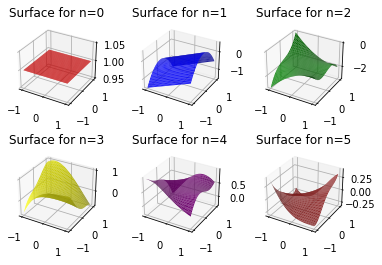

In [25]:
import numpy as np
import matplotlib.pyplot as plt
fig=plt.figure()
ax1=fig.add_subplot(231,projection='3d')
ax2=fig.add_subplot(232,projection='3d')
ax3=fig.add_subplot(233,projection='3d')
ax4=fig.add_subplot(234,projection='3d')
ax5=fig.add_subplot(235,projection='3d')
ax6=fig.add_subplot(236,projection='3d')
x=np.linspace(-1,1)
y=np.linspace(-1,1)
X,Y=np.meshgrid(x,y)
Z1=evalFn(0,X,Y)
Z2=evalFn(1,X,Y)
Z3=evalFn(2,X,Y)
Z4=evalFn(3,X,Y)
Z5=evalFn(4,X,Y)
Z6=evalFn(5,X,Y)
ax1.plot_surface(X,Y,Z1,color="red")
ax1.set_title("Surface for n=0")
ax2.plot_surface(X,Y,Z2,color="blue")
ax2.set_title("Surface for n=1")
ax3.plot_surface(X,Y,Z3,color="green")
ax3.set_title("Surface for n=2")
ax4.plot_surface(X,Y,Z4,color="yellow")
ax4.set_title("Surface for n=3")
ax5.plot_surface(X,Y,Z5,color="purple")
ax5.set_title("Surface for n=4")
ax6.plot_surface(X,Y,Z6,color="brown")
ax6.set_title("Surface for n=5")
plt.subplots_adjust(wspace=0.4, hspace=0.4)
plt.show()

**(c) [5 marks]**
In addition to working numerically we can also use SymPy to study the functions $F_n$ symbolically and obtain explicit expressions.

(i) Use `SymPy` to write a function `symbolicFn` which gives an expression for $F_n(x,y)$ as a polynomial in $x$ and $y$ of the form 

$$
\sum_{i,j} a(n,i,j)x^i y^j.
$$

The function should take symbolic values for $x$ and $y$ (as given by e.g. `x, y = sympy.symbols('x y')`) as input and output a polynomial in $x$ and $y$ of the type `sympy.Poly`.

(ii) Call this function and compute explicit expressions of $F_n$ for $n=2,3$ and $4$ and give your answer in the indicated cell below.

Hints: you might find the functions .as_poly() and sympy.Poly useful.

In [26]:
import sympy
from sympy import poly
def symbolicFn(n,x,y):
    sum1=0
    F0=1
    F1=(x/2)-(y**2)
    F_n_plus_one=0
    if n==0:
        F0=F0
        sum1=sum1+F0
    else:
        for i in range(1,n+1):
            F_n_plus_one=(((x*y)/i)*F1)-((((2*i)+1)/(2*(i**2)))*F0)           
            F0=F1
            F1=F_n_plus_one
        sum1=sum1+F0
    if type(sum1)==int:
        return sum1
    else:
        sum1=sum1.as_poly()
        return sum1

In [27]:
# 2 marks
# Test that the above algorithm provides reasonable outcome
from nose.tools import assert_equal,assert_almost_equal,assert_raises,assert_true
import sympy
x, y = sympy.symbols('x y')
# Check that we get back the constant 1 as a polynomial in x and y (even though the only power is x^0y^0)
assert_equal(symbolicFn(0,x,y),sympy.Poly(1,x,y,domain=sympy.QQ)) 
assert_equal(symbolicFn(1,x,y),sympy.Poly(x/2-y**2,x,y))

[3 marks]:

Insert the expressions you found for $F_2$, $F_3$ and $F_4$ here. Use LaTeX notation to display the polynomials. Recall that in Markdown LaTeX expressions are contained between \$\$ signs. For instance, the following:
```
$$
p_i(x,y) = \frac{4}{5}x^2 y^3 - \frac{1}{2} x^4 y^5 - 2 x
$$
```
displays as 
$$
p_i(x,y) = \frac{4}{5}x^2 y^3 - \frac{1}{2} x^4 y^5 - 2 x.
$$
To find the LaTeX expression of a given object in SymPy you can use the function sympy.latex(). For example:
```
sympy.latex(sympy.QQ(4)/sympy.QQ(5)*x**2*y**3) 
```
outputs '\\frac{4 x^{2} y^{3}}{5}'. Note that the '\\' sign is escaped as '\\\\' so you need to replace it by a single '\\'.


$$
F_2(x,y) = 0.5 x^2 y - 1.0 x y^3 - 1.5
$$

$$
F_3(x,y) = 0.25 x^3 y^2 - 0.5 x^2 y^4 - 0.75 x y - 0.3125 x + 0.625 y^2
$$

$$
F_4(x,y) = 0.083 x^4 y^3 - 0.167 x^3 y^5 - 0.25 x^2 y^2 - 0.2986 x^2 y + 0.5972 x y^3 + 0.583
$$

**(d) [5 marks]**
Use SymPy to find the exact value of the integral 
$$
\int_{-1}^{1} \int_{-1}^{1} F_n(x,y)dx dy.
$$

for $n=3$ and $4$. Write your code to compute the integrals for a general $n$ in the function below. 
There will be a visible test for $n=3$ and a hidden test for $n=4$. 

In [28]:
import sympy
def compute_integral(n):
    sum1=0
    F0=1
    F1=(x/2)-(y**2)
    F_n_plus_one=0
    if n==0:
        F0=F0
        sum1=sum1+F0
    else:
        for i in range(1,n+1):
            F_n_plus_one=(((x*y)/i)*F1)-((((2*i)+1)/(2*(i**2)))*F0)           
            F0=F1
            F1=F_n_plus_one
        sum1=sum1+F0
    if type(sum1)==int:
        return sum1
    else:
        sum1=sum1.as_poly()
    r=sympy.integrate(sympy.integrate(sum1.as_expr(),(y,-1,1)),(x,-1,1))
    t=sympy.nsimplify(r)
    return t

In [29]:
# 3 marks
# Test that the compute_integral produces the correct output for n=3
from nose.tools import assert_equal
import sympy
assert_equal(compute_integral(3),sympy.QQ(7)/sympy.QQ(10))

In [30]:
# 2 marks
# Hidden Test that the compute_integral produces the correct output for n=4
from nose.tools import assert_equal
import sympy

## Question 3 [LMA]

The Gram-Schmidt process is an algorithm which can be used to construct a set of vectors $\{\mathbf{w}_i\}$ which are **orthonormal**, in other words they are pairwise orthogonal to each other and have lengths equal to 1. This condition can be  expressed in terms of the standard Euclidean scalar (or "dot") product as 

$$
\mathbf{w}_i \cdot \mathbf{w}_j = 
\begin{cases}
1 & \text{if } i = j,\\
0 & \text{if } i\ne j.
\end{cases}
$$

If the input to the Gram-Schmidt process is a set of $n$ linearly independent vectors $\{ \mathbf{v}_i \mid i=1,\ldots,n\}$ in $\mathbb{R}^{n}$, then the output will be a set of $n$ orthonormal vectors $\{\mathbf{w}_i \mid i=1,\ldots,n\}$ in $\mathbb{R}^{n}$.

In general, if the input vectors are not all linearly independent, then the output will be a set of $n$ vectors containing an orthonormal basis for the linear span of the vectors $\{ \mathbf{v}_i\}$ together with a number of zero-vectors.

The method is summarised by the following instructions:
- Construct an orthogonal set of vectors $\{\mathbf{w}_i\}$ using the formula: $\mathbf{w}_1=\mathbf{v}_1$ and 

$$
\mathbf{w}_i = \mathbf{v}_i - \sum_{j=1}^{i-1} \frac{\mathbf{v}_i\cdot \mathbf{w}_j}{\| \mathbf{w}_j\|}\mathbf{w}_j,\quad i>1.
$$

- If $\mathbf{w}_i$ from the previous step is not the zero vector $\mathbf{0}$, normalise it to have length 1 by setting 

$$
\mathbf{w}_i = \frac{\mathbf{w}_i}{\|\mathbf{w}_i \|}.
$$


**(a) [10 marks]**
Write a function `gram_schmidt_np` which takes an $n \times n$ matrix $V$ given as NumPy array as an input, where the columns of $V$ represent the set of $n$-dimensional vectors $\{\mathbf{v}_i\}$, then uses the Gram-Schmidt process to construct an orthonormal set of vectors $\{\mathbf{w}_i\}$, which are output as the columns of the matrix $W$.

- Your function should check that the input V is a square matrix of type np.ndarray, and raise a ValueError if not.
- In the normalisation step you can check if $w_i$ has norm less than $1\cdot 10^{-10}$ instead of checking if it is exactly 0 and in this case just replace it by the zero vector instead of normalising it. 


In [31]:
import numpy as np
def gram_schmidt_np(V):
    if type(V)!=np.ndarray:
        raise ValueError("The input must be of the type np.ndarray")
    if V.shape[0]!=V.shape[1]:
        raise ValueError("The input must be a square matrix")
    V=V.transpose()
    m=V.shape[0]
    n=V.shape[1]
    array=[V[0]]
    array2=[]
    sum1=0
    sum2=0
    sum3=0
    for i in range(0,m-1):
        W1=V[i]
        r=W1*V[i+1]
        t=W1*W1
        for j in range(0,n):
            sum1=sum1+r[j]
            sum2=sum2+t[j]
        W2=V[i+1]-(((sum1/sum2))*(W1))
        array.append(W2)
        W1=W2
    for k in range(0,len(array)):
        x=array[k]
        if x.all()==0:
            array2.append(x)
        else: 
            sum3=0
            for l in range(0,len(x)):
                sum3=sum3+((x[l])**2)
                root=np.sqrt(sum3)
                ans=x/root
            array2.append(ans)
    matrix=np.asarray(array2)
    ans=matrix.transpose()
    return ans

In [32]:
# 3 marks
# Check that it works for a specific matrix V of linearly independent vectors
from nose.tools import assert_almost_equal
import numpy as np
V = np.array([[1,2],[3,4]])
W = np.array([[ 0.31622777,  0.9486833 ],[ 0.9486833 , -0.31622777]])
W1 = gram_schmidt_np(V)
difference = np.linalg.norm(W1-W)
assert_almost_equal(difference,0,delta=1e-8)

In [33]:
# 3 marks
# Check that it works for a case when vectors are linearly dependent
from nose.tools import assert_almost_equal
import numpy as np
V = np.array([[1,2],[2,4]])
W = gram_schmidt_np(V)
W1 = np.array([[0.4472136 , 0.        ], [0.89442719, 0.        ]])
difference = np.linalg.norm(W1-W)
assert_almost_equal(difference,0,delta=1e-8)

In [34]:
# 2 marks
# Hidden test that it works for another matrix input
from nose.tools import assert_almost_equal
import numpy as np

In [35]:
# 2 marks
# Check that errors are raised for wrong input
from nose.tools import assert_raises
assert_raises(ValueError,gram_schmidt_np,1)
assert_raises(ValueError,gram_schmidt_np,np.array([[1,2],[3,4],[5,6]]))

Instead of using NumPy for working with vectors it is also possible to use SymPy.

**(b) [10 marks]** 

Write a function `gram_schmidt_sp` which takes an $n \times n$ square matrix $V$ given as a SymPy Matrix as input, where the columns of $V$ represent the set of $n$-dimensional vectors $\{\mathbf{v}_i\}$, then uses the Gram-Schmidt process to construct an orthonormal set of vectors $\{\mathbf{w}_i\}$, which are output as the columns of a new $n\times n$ square SymPy  matrix $W$.
- Your function should check that the input V is a square matrix of type sympy.Matrix, and raise a ValueError if not.

Note: While the algorithm is the same as above you will need to figure out for yourself how to extract columns from a SymPy matrix (the columns will themselves be $n \times 1$ matrices), how to take the dot product and norm of a SymPy matrix and how to join columns to make a new SymPy matrix. (Hint: The function sympy.Matrix.row_join can be useful.)

In [36]:
import sympy
def gram_schmidt_sp(V):
    if type(V)!=sympy.Matrix:      
        raise ValueError("The input must be of the type np.ndarray")
    if V.shape[0]!=V.shape[1]:
        raise ValueError("The input must be a square matrix")
    V=V.transpose()
    m=V.shape[0]
    n=V.shape[1]
    array=V[0,:]
    array2=sympy.Matrix()
    sum1=0
    sum2=0
    sum3=0
    for i in range(0,m-1):
        W1=V[i, :]
        s=V[i+1, :]
        r=W1*s.T
        val=r.det()
        t=W1*W1.T
        val1=t.det()
        W2=s-(((val/val1))*(W1))
        array=array.row_insert(i+1,W2)
        W1=W2
    for k in range(0,m):
        x=array[k, :]
        if x==sympy.zeros(1,n):
            array2=array2.row_insert(k+1, x)
        else: 
            sum3=0
            for l in range(0,len(x)):
                sum3=sum3+((x[l])**2)
                root=sympy.sqrt(sum3)
                ans=x/root
            array2=array2.row_insert(l+1, ans)
    matrix=sympy.Matrix(array2)
    fin=matrix.transpose() 
    return fin

In [37]:
# 3 marks
# Test that it works for a specific matrix V
from nose.tools import assert_equal
import sympy
V = sympy.Matrix([[1,2],[3,4]])
W = sympy.Matrix([[sympy.sqrt(10)/10, 3*sympy.sqrt(10)/10], [3*sympy.sqrt(10)/10, -sympy.sqrt(10)/10]])
W1 = gram_schmidt_sp(V)
assert_equal(W-W1,sympy.zeros(2,2))

In [38]:
# 3 marks
# Check that it works for a case when vectors that are linearly dependent
from nose.tools import assert_equal
import sympy
V = sympy.Matrix([[1,2],[2,4]])
W = sympy.Matrix([[sympy.sqrt(5)/5, 0], [2*sympy.sqrt(5)/5, 0]])
W1 = gram_schmidt_sp(V)
assert_equal(W-W1,sympy.zeros(2,2))

In [39]:
# 2 marks
# Hidden test that it works for another matrix input
from nose.tools import assert_equal
import sympy

In [40]:
# 2 marks
# Check that errors are raised for wrong input
from nose.tools import assert_raises
import sympy
assert_raises(ValueError,gram_schmidt_sp,1)
assert_raises(ValueError,gram_schmidt_sp,sympy.Matrix([[1,2],[3,4],[5,6]]))